In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# -*- coding: utf-8 -*-
"""
Spyder Editor
This is a temporary script file.
"""
# %% 
# Make sure to run from Users/eabernal/Documents/deep-pd/data/preprocessed
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

df1= pd.read_csv('/content/drive/MyDrive/DeeP-PD/deep-pd/data/preprocessed/steady_data_full.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (99,496,585,591,592,593,594,595,596,597,598,599,600,601,602,603,606,607,608,609,610,641,642,643,644,645,680) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:

#np1cog
npcog_steady=df1.np1cog
npcog_steadyidx = ~(npcog_steady.isnull())

mds_updrs=df1.p1imprn
mds_updrsidx = ~(mds_updrs.isnull())

# moca score
moca = df1.mcatot
mocaidx = ~(moca.isnull())

sex = df1.gender
sexidx = ~(sex.isnull())



patno_steady = df1.sid
pat_steadyidx = ~(patno_steady.isnull())
eventid_steady=df1.event_id
event_steadyidx=~(eventid_steady.isnull())

# weight and height for BMI index
weight=df1.wgtkg
weightidx=~(weight.isnull())
height=df1.htcm
heightidx=~(height.isnull())

# supine blood pressure 
syssup=df1.sysseat
syssupidx=~(syssup.isnull())
diasup=df1.diaseat
diasupidx=~(diasup.isnull())

# standing blood pressure 
sysstnd=df1.sysstnd
sysstndidx=~(sysstnd.isnull())
diastnd=df1.diastnd
diastndidx=~(diastnd.isnull())

#Schwab and England activities
mseadlg=df1.mseadln
mseadlgidx=~(mseadlg.isnull())

#age
age=df1.age
ageidx=~(age.isnull())

#total daily dose
totddose=df1.totddose
totddoseidx=~(totddose.isnull())

#verbal fluency
mcavf=df1.mcavf
mcavfidx=~(mcavf.isnull())

#hand movements 
lefthand=df1.np3hmovl
lefthandidx=~(lefthand.isnull())
righthand=df1.np3hmovr
righthandidx=~(righthand.isnull())

#kinetic tremor
tremorleft=df1.np3ktrml
tremorleftidx=~(tremorleft.isnull())
tremorright=df1.np3ktrmr
tremorrightidx=~(tremorright.isnull())

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] C=0.001, gamma=1, kernel=rbf ....................................
[CV] ........ C=0.001, gamma=1, kernel=rbf, score=0.213, total=   0.0s
[CV] C=0.001, gamma=1, kernel=rbf ....................................
[CV] ........ C=0.001, gamma=1, kernel=rbf, score=0.213, total=   0.0s
[CV] C=0.001, gamma=1, kernel=rbf ....................................
[CV] ........ C=0.001, gamma=1, kernel=rbf, score=0.213, total=   0.0s
[CV] C=0.001, gamma=1, kernel=rbf ....................................
[CV] ........ C=0.001, gamma=1, kernel=rbf, score=0.212, total=   0.0s
[CV] C=0.001, gamma=1, kernel=rbf ....................................
[CV] ........ C=0.001, gamma=1, kernel=rbf, score=0.213, total=   0.0s
[CV] C=0.001, gamma=1, kernel=linear .................................
[CV] ..... C=0.001, gamma=1, kernel=linear, score=0.213, total=   0.0s
[CV] C=0.001, gamma=1, kernel=linear .................................
[CV] ..... C=0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...... C=0.001, gamma=0.1, kernel=rbf, score=0.212, total=   0.0s
[CV] C=0.001, gamma=0.1, kernel=rbf ..................................
[CV] ...... C=0.001, gamma=0.1, kernel=rbf, score=0.213, total=   0.0s
[CV] C=0.001, gamma=0.1, kernel=linear ...............................
[CV] ... C=0.001, gamma=0.1, kernel=linear, score=0.213, total=   0.0s
[CV] C=0.001, gamma=0.1, kernel=linear ...............................
[CV] ... C=0.001, gamma=0.1, kernel=linear, score=0.213, total=   0.0s
[CV] C=0.001, gamma=0.1, kernel=linear ...............................
[CV] ... C=0.001, gamma=0.1, kernel=linear, score=0.213, total=   0.0s
[CV] C=0.001, gamma=0.1, kernel=linear ...............................
[CV] ... C=0.001, gamma=0.1, kernel=linear, score=0.212, total=   0.0s
[CV] C=0.001, gamma=0.1, kernel=linear ...............................
[CV] ... C=0.001, gamma=0.1, kernel=linear, score=0.213, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.8s finished


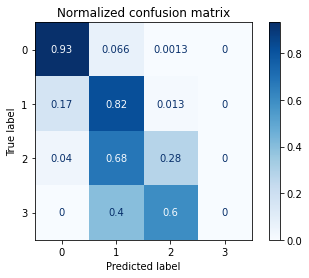

Normalized confusion matrix
[[0.91556728 0.08443272 0.         0.        ]
 [0.1965812  0.76923077 0.03418803 0.        ]
 [0.         0.58333333 0.41666667 0.        ]
 [0.         0.5        0.5        0.        ]]


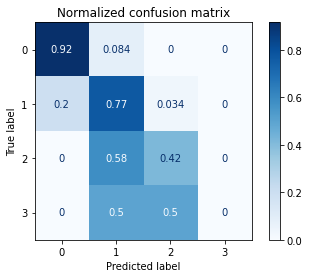

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit

idx= mds_updrsidx & npcog_steadyidx
data = np.stack((mds_updrs[idx],npcog_steady[idx],eventid_steady[idx],patno_steady[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
#data1=data
data=data1[:,:1].astype(float)
labels=data1[:,1].astype(float)

# defining parameter range 
param_grid = {'C': [0.001,0.01,0.1,1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight={0:.05, 1:.05, 2:.25, 3:.65}), param_grid, refit = True, verbose = 3, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=[0,1,2,3],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=[0,1,2,3],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
testdata = np.arange(0.0, 3.0, 0.2).reshape(-1,1)
out=model.predict(testdata)
t1 = testdata[np.where(out==1)[0].min()] - 0.2
#t2 = testdata[np.where(out==2)[0].min()] - 0.5
t3 = testdata[np.where(out==3)[0].min()] - 0.2

In [ ]:
from collections import Counter

Counter(data.flatten('F'))

Counter({0.0: 1126, 1.0: 394, 2.0: 23, 3.0: 1})

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/DeeP-PD/deep-pd/data/preprocessed/ppmi_full.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,4,5,6,7,8,10,14,15,18,21,24,28,29,32,42,43,48,51,100,102,109,117,130,131,132,133,134,135,136,137,138,139,147,148,154,158,163,164,165,175,180,194,199,206,212,218,225,234,237,238,241,243,311,313,315,317,319,321,323,325,327,329,331,333,335,337,339,341,343,345,347,365,382,383,389,392,393,399,400,404,407,408,409,411,412,414,415,416,420,421,423,424,425,428,429,435,438,439,445,448,493,494,497,498,500,505,507,511,515,520,523,525,527,529,531,534,544,545,574,575,576,654,656,658,660,662,664,666,668,670,688,689,692,694,708,709,732,734,760,764,766,768,770,778,779,792,793,794,795,796,797,798,800,802,803,804,846,849,854,863,865,870,871,900,901,902,903,918,929,931,949,960,961,962,963,964,965,966,967,972,973,1062,1072,1082,1083,1085,1094,1095,1101,1104,1105,1107,1139,1140,1142,1184,1185,1187,1426,1427,1429,1444,1575,1577,1596,1597,1612,1613,1615,1665,1666,1668,1673,1680,1687,1694,1695,1697,1707,1709,1

In [ ]:
#np1cog
npcog=df.np1cog
npcogidx = ~(npcog.isnull())
np.unique(npcog[~np.isnan(npcog)])

array([0., 1., 2., 3., 4.])

In [ ]:
import sys
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.neighbors import kneighbors_graph
from scipy.sparse.csgraph import minimum_spanning_tree
SIGNIFICANCE = 0.05


def mst_edges(V, k):
    """
    Construct the approximate minimum spanning tree from vectors V

    :param: V: 2D array, sequence of vectors
    :param: k: int the number of neighbor to consider for each vector
    :return: V ndarray of edges forming the MST
    """

    # k = len(X)-1 gives the exact MST
    k = min(len(V) - 1, k)

    # generate a sparse graph using the k nearest neighbors of each point
    G = kneighbors_graph(V, n_neighbors=k, mode='distance')

    # Compute the minimum spanning tree of this graph
    full_tree = minimum_spanning_tree(G, overwrite=True)

    return np.array(full_tree.nonzero()).T


def ww_test(X, Y, k=10):
    """
    Multi-dimensional Wald-Wolfowitz test

    :param X: multivariate sample X as a numpy ndarray
    :param Y: multivariate sample Y as a numpy ndarray
    :param k: number of neighbors to consider for each vector
    :return: W the WW test statistic, R the number of runs
    """
    m, n = len(X), len(Y)
    N = m + n

    XY = np.concatenate([X, Y]).astype(np.float)

    # XY += np.random.normal(0, noise_scale, XY.shape)

    edges = mst_edges(XY, k)

    labels = np.array([0] * m + [1] * n)

    c = labels[edges]
    runs_edges = edges[c[:, 0] == c[:, 1]]

    # number of runs is the total number of observations minus edges within each run
    R = N - len(runs_edges)

    # expected value of R
    e_R = ((2.0 * m * n) / N) + 1

    # variance of R is _numer/_denom
    _numer = 2 * m * n * (2 * m * n - N)
    _denom = N ** 2 * (N - 1)

    # see Eq. 1 in Friedman 1979
    # W approaches a standard normal distribution
    W = (R - e_R) / np.sqrt(_numer/_denom)

    return W, R


In [ ]:
# distribution significance test of updrs and mds_updrs with values of 0
idx= weightidx & heightidx &ageidx & mseadlgidx & sexidx & mocaidx & mds_updrsidx & npcog_steadyidx
#idx= mseadlgidx & sexidx & mocaidx & weightidx & heightidx & syssupidx & diasupidx & sysstndidx & diastndidx & mds_updrsidx & npcog_steadyidx
bmi=weight[idx]/(height[idx]*10**-2)**2
data = np.stack((moca[idx],sex[idx],bmi,age[idx],mseadlg[idx],mds_updrs[idx],npcog_steady[idx],eventid_steady[idx],patno_steady[idx],),1)
#data = np.stack((moca[idx],mseadlg[idx],bmi,syssup[idx],diasup[idx],sysstnd[idx],diastnd[idx],sex[idx],mds_updrs[idx],npcog_steady[idx],eventid_steady[idx],patno_steady[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values

par=7 #10

data_mds=data1[:,:par-1].astype(float)
data_npcog=data1[:,:par].astype(float)
mds_0=data_mds[np.where(data_mds[:,par-2] == 1)]
mds_0=mds_0[:,:par-2]
#mds_0= mds_0 / mds_0.max(axis=0)
npcog_0=data_npcog[np.where(data_npcog[:,par-1] == 0)]
npcog_0=npcog_0[:,:par-2]
#npcog_0= npcog_0 / npcog_0.max(axis=0)
W, R = ww_test(mds_0, npcog_0)
pvalue = stats.norm.cdf(W)  # one sided test
reject = pvalue <= SIGNIFICANCE
print(pvalue,W)

7.868522756853718e-06 -4.318110762468596


In [ ]:
np.max(npcog_0[0,:])

1.0

In [ ]:
import pandas as pd
from scipy.stats import ks_2samp

In [ ]:
#SIMPLE kOLMOGOROV sMIRNOV TEST for each separate variable
# distribution significance test of updrs and mds_updrs with values of 0
idx=diasupidx & mds_updrsidx & npcog_steadyidx
#idx= mseadlgidx & sexidx & mocaidx & weightidx & heightidx & syssupidx & diasupidx & sysstndidx & diastndidx & mds_updrsidx & npcog_steadyidx
bmi=weight[idx]/(height[idx]*10**-2)**2
data = np.stack((diasup[idx],mds_updrs[idx],npcog_steady[idx],eventid_steady[idx],patno_steady[idx],),1)
#data = np.stack((moca[idx],mseadlg[idx],bmi,syssup[idx],diasup[idx],sysstnd[idx],diastnd[idx],sex[idx],mds_updrs[idx],npcog_steady[idx],eventid_steady[idx],patno_steady[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
par=3 #10

data_mds=data1[:,:par-1].astype(float)
data_npcog=data1[:,:par].astype(float)
mds_0=data_mds[np.where(data_mds[:,par-2] == 2)]
mds_0=mds_0[:,:par-2]
mds_0=mds_0.reshape((len(mds_0,)))
npcog_0=data_npcog[np.where(data_npcog[:,par-1] == 2)]
npcog_0=npcog_0[:,:par-2]
npcog_0=npcog_0.reshape((len(npcog_0,)))

test = ks_2samp(mds_0,npcog_0)
print(test)

Ks_2sampResult(statistic=0.08225616921269095, pvalue=0.9996387518818992)


In [ ]:
len(mds_0)

23

In [ ]:
# 2 dimensional Kolmogorov smirnov test
from __future__ import division
import numpy as np
from numpy import random
from scipy.spatial.distance import pdist, cdist
from scipy.stats import kstwobign, pearsonr
from scipy.stats import genextreme

__all__ = ['ks2d2s', 'estat', 'estat2d']


def ks2d2s(x1, y1, x2, y2, nboot=None, extra=False):
    '''Two-dimensional Kolmogorov-Smirnov test on two samples. 
    Parameters
    ----------
    x1, y1 : ndarray, shape (n1, )
        Data of sample 1.
    x2, y2 : ndarray, shape (n2, )
        Data of sample 2. Size of two samples can be different.
    extra: bool, optional
        If True, KS statistic is also returned. Default is False.
    Returns
    -------
    p : float
        Two-tailed p-value.
    D : float, optional
        KS statistic. Returned if keyword `extra` is True.
    Notes
    -----
    This is the two-sided K-S test. Small p-values means that the two samples are significantly different. Note that the p-value is only an approximation as the analytic distribution is unkonwn. The approximation is accurate enough when N > ~20 and p-value < ~0.20 or so. When p-value > 0.20, the value may not be accurate, but it certainly implies that the two samples are not significantly different. (cf. Press 2007)
    References
    ----------
    Peacock, J.A. 1983, Two-Dimensional Goodness-of-Fit Testing in Astronomy, Monthly Notices of the Royal Astronomical Society, vol. 202, pp. 615-627
    Fasano, G. and Franceschini, A. 1987, A Multidimensional Version of the Kolmogorov-Smirnov Test, Monthly Notices of the Royal Astronomical Society, vol. 225, pp. 155-170
    Press, W.H. et al. 2007, Numerical Recipes, section 14.8
    '''
    assert (len(x1) == len(y1)) and (len(x2) == len(y2))
    n1, n2 = len(x1), len(x2)
    D = avgmaxdist(x1, y1, x2, y2)

    if nboot is None:
        sqen = np.sqrt(n1 * n2 / (n1 + n2))
        r1 = pearsonr(x1, y1)[0]
        r2 = pearsonr(x2, y2)[0]
        r = np.sqrt(1 - 0.5 * (r1**2 + r2**2))
        d = D * sqen / (1 + r * (0.25 - 0.75 / sqen))
        p = kstwobign.sf(d)
    else:
        n = n1 + n2
        x = np.concatenate([x1, x2])
        y = np.concatenate([y1, y2])
        d = np.empty(nboot, 'f')
        for i in range(nboot):
            idx = random.choice(n, n, replace=True)
            ix1, ix2 = idx[:n1], idx[n1:]
            #ix1 = random.choice(n, n1, replace=True)
            #ix2 = random.choice(n, n2, replace=True)
            d[i] = avgmaxdist(x[ix1], y[ix1], x[ix2], y[ix2])
        p = np.sum(d > D).astype('f') / nboot
    if extra:
        return p, D
    else:
        return p


def avgmaxdist(x1, y1, x2, y2):
    D1 = maxdist(x1, y1, x2, y2)
    D2 = maxdist(x2, y2, x1, y1)
    return (D1 + D2) / 2


def maxdist(x1, y1, x2, y2):
    n1 = len(x1)
    D1 = np.empty((n1, 4))
    for i in range(n1):
        a1, b1, c1, d1 = quadct(x1[i], y1[i], x1, y1)
        a2, b2, c2, d2 = quadct(x1[i], y1[i], x2, y2)
        D1[i] = [a1 - a2, b1 - b2, c1 - c2, d1 - d2]

    # re-assign the point to maximize difference,
    # the discrepancy is significant for N < ~50
    D1[:, 0] -= 1 / n1

    dmin, dmax = -D1.min(), D1.max() + 1 / n1
    return max(dmin, dmax)


def quadct(x, y, xx, yy):
    n = len(xx)
    ix1, ix2 = xx <= x, yy <= y
    a = np.sum(ix1 & ix2) / n
    b = np.sum(ix1 & ~ix2) / n
    c = np.sum(~ix1 & ix2) / n
    d = 1 - a - b - c
    return a, b, c, d


def estat2d(x1, y1, x2, y2, **kwds):
    return estat(np.c_[x1, y1], np.c_[x2, y2], **kwds)


def estat(x, y, nboot=1000, replace=False, method='log', fitting=False):
    '''
    Energy distance statistics test.
    Reference
    ---------
    Aslan, B, Zech, G (2005) Statistical energy as a tool for binning-free
      multivariate goodness-of-fit tests, two-sample comparison and unfolding.
      Nuc Instr and Meth in Phys Res A 537: 626-636
    Szekely, G, Rizzo, M (2014) Energy statistics: A class of statistics
      based on distances. J Stat Planning & Infer 143: 1249-1272
    Brian Lau, multdist, https://github.com/brian-lau/multdist
    '''
    n, N = len(x), len(x) + len(y)
    stack = np.vstack([x, y])
    stack = (stack - stack.mean(0)) / stack.std(0)
    if replace:
        rand = lambda x: random.randint(x, size=x)
    else:
        rand = random.permutation

    en = energy(stack[:n], stack[n:], method)
    en_boot = np.zeros(nboot, 'f')
    for i in range(nboot):
        idx = rand(N)
        en_boot[i] = energy(stack[idx[:n]], stack[idx[n:]], method)

    if fitting:
        param = genextreme.fit(en_boot)
        p = genextreme.sf(en, *param)
        return p, en, param
    else:
        p = (en_boot >= en).sum() / nboot
        return p, en, en_boot


def energy(x, y, method='log'):
    dx, dy, dxy = pdist(x), pdist(y), cdist(x, y)
    n, m = len(x), len(y)
    if method == 'log':
        dx, dy, dxy = np.log(dx), np.log(dy), np.log(dxy)
    elif method == 'gaussian':
        raise NotImplementedError
    elif method == 'linear':
        pass
    else:
        raise ValueError
    z = dxy.sum() / (n * m) - dx.sum() / n**2 - dy.sum() / m**2
    # z = ((n*m)/(n+m)) * z # ref. SR
    return z

In [ ]:
# distribution significance test of updrs and mds_updrs with values of 0
idx=mocaidx & ageidx & mds_updrsidx & npcog_steadyidx
#idx= mseadlgidx & sexidx & mocaidx & weightidx & heightidx & syssupidx & diasupidx & sysstndidx & diastndidx & mds_updrsidx & npcog_steadyidx
bmi=weight[idx]/(height[idx]*10**-2)**2
data = np.stack((moca[idx],age[idx],mds_updrs[idx],npcog_steady[idx],eventid_steady[idx],patno_steady[idx],),1)
#data = np.stack((moca[idx],mseadlg[idx],bmi,syssup[idx],diasup[idx],sysstnd[idx],diastnd[idx],sex[idx],mds_updrs[idx],npcog_steady[idx],eventid_steady[idx],patno_steady[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
#data1=data
par=4 #10

data_mds=data1[:,:par-1].astype(float)
data_npcog=data1[:,:par].astype(float)
mds_0=data_mds[np.where(data_mds[:,par-2] == 2)]
mds_0=mds_0[:,:par-2]
mds_01=mds_0[:,0].reshape((len(mds_0,)))
mds_02=mds_0[:,1].reshape((len(mds_0,)))
npcog_0=data_npcog[np.where(data_npcog[:,par-1] == 1)]
npcog_0=npcog_0[:,:par-2]
npcog_01=npcog_0[:,0].reshape((len(npcog_0,)))
npcog_02=npcog_0[:,1].reshape((len(npcog_0,)))

test=ks2d2s(mds_01, mds_02, npcog_01, npcog_02, nboot=None, extra=False)
test

0.05838294524141307

In [ ]:
#graph

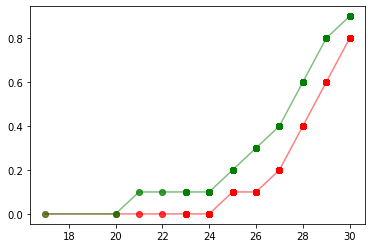

In [ ]:
#SIMPLE kOLMOGOROV sMIRNOV TEST for each separate variable
# distribution significance test of updrs and mds_updrs with values of 0
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import scipy.stats as st

idx=mocaidx & mds_updrsidx & npcog_steadyidx
#idx= mseadlgidx & sexidx & mocaidx & weightidx & heightidx & syssupidx & diasupidx & sysstndidx & diastndidx & mds_updrsidx & npcog_steadyidx
bmi=weight[idx]/(height[idx]*10**-2)**2
data = np.stack((moca[idx],mds_updrs[idx],npcog_steady[idx],eventid_steady[idx],patno_steady[idx],),1)
#data = np.stack((moca[idx],mseadlg[idx],bmi,syssup[idx],diasup[idx],sysstnd[idx],diastnd[idx],sex[idx],mds_updrs[idx],npcog_steady[idx],eventid_steady[idx],patno_steady[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
par=3 #10

data_mds=data1[:,:par-1].astype(float)
data_npcog=data1[:,:par].astype(float)
mds_0=data_mds[np.where(data_mds[:,par-2] == 0)]
mds_0=mds_0[:,:par-2]
mds_0=mds_0.reshape((len(mds_0,)))
npcog_0=data_npcog[np.where(data_npcog[:,par-1] == 2)]
npcog_0=npcog_0[:,:par-2]
npcog_0=npcog_0.reshape((len(npcog_0,)))
x_y = np.sort(np.concatenate((mds_0, npcog_0)))
x_cdf = [np.round(st.percentileofscore(mds_0, samp)/100, 1) for samp in x_y]
y_cdf = [np.round(st.percentileofscore(npcog_0, samp)/100, 1) for samp in x_y]
plt.plot(x_y, x_cdf, label='x', alpha=0.5, marker='o', color='red')
plt.plot(x_y, y_cdf, label='y', alpha=0.5, marker='o', color='green')
plt.show()

In [ ]:
# Now we will evaluate classification models in PPMI with binarization of np1cog

In [48]:

df = pd.read_csv('/content/drive/MyDrive/DeeP-PD/deep-pd/data/preprocessed/ppmi_modified2.csv')

# create model for separate on_off_dose
#df = df[(df.on_off_dose==2)]
#df = df.reset_index()

# %% 
# MOCA vs line orientation
# mca_tot vs jlo_totraw

# patient number
pat = df.patno
# moca score
moca = df.mcatot
mocaidx = ~(moca.isnull())
clincog = df.cogstate
clincogidx = ~(clincog.isnull())
#np1cog
npcog=df.np1cog
npcogidx = ~(npcog.isnull())
#npcog[npcog>0] = 1

delta_visit=df.delta_visit
#PD status
pdstatus=df.apprdx
pdstatusidx = ~(pdstatus.isnull())
#pdstatus[pdstatus>1]=0
#pdstatusidx= (pdstatus.isin([1, 2]))

# years with PD
pddxdt=df.pddxdt
pddxdt = pddxdt.replace(np.nan, 0) #comment as needed
pddxdtyear=pd.DatetimeIndex(pddxdt).year.values
pddxdtmonth=pd.DatetimeIndex(pddxdt).month.values
pddxdtidx= ~(pddxdt.isnull())
infodt=df.infodt
infodtyear=pd.DatetimeIndex(infodt).year.values
infodtmonth=pd.DatetimeIndex(infodt).month.values
infodtidx= ~(infodt.isnull())

years_pd = np.zeros(len(pddxdt))*float("NaN")
for i in range(len(years_pd)):
    if pddxdtidx[i] & infodtidx[i]:
      if pddxdtyear[i] ==0:
        years_pd[i]=0
      else:
        pdd_year=int(pddxdtyear[i]) 
        pdd_month=int(pddxdtmonth[i])
        visit_year=int(infodtyear[i])
        visit_month=int(infodtmonth[i])
        temp = (visit_year - pdd_year) * 12 + visit_month - pdd_month
        if temp > 0:
          years_pd[i]=temp
        else:
          years_pd[i]=0


educ = df.educyrs
educidx = ~(educ.isnull())

#bday
bdt = df.birthdt
bdtyear =pd.DatetimeIndex(bdt).year.values
bdtidx = ~(bdt.isnull())

#date of moca
mocadt = df.infodt
mocadtidx = ~(mocadt.isnull())

symdig = df.sdmtotal
symdigidx = ~(symdig.isnull())

sex = df.gender
sexidx = ~(sex.isnull())

#age at moca
age = np.zeros(len(moca))*float("NaN")
for i in range(len(age)):
    if mocadtidx[i] & bdtidx[i]:
        age[i] = int(infodtyear[i]) - bdtyear[i]


patno = df.patno
patidx = ~(patno.isnull())
eventid=df.event_id
eventidx=~(eventid.isnull())

# weight and height for BMI index
weight=df.wgtkg
weightidx=~(weight.isnull())
height=df.htcm
heightidx=~(height.isnull())

# supine blood pressure 
syssup=df.syssup
syssupidx=~(syssup.isnull())
diasup=df.diasup
diasupidx=~(diasup.isnull())

# standing blood pressure 
sysstnd=df.sysstnd
sysstndidx=~(sysstnd.isnull())
diastnd=df.diastnd
diastndidx=~(diastnd.isnull())

#Schwab and England activities
mseadlg=df.mseadlg
mseadlgidx=~(mseadlg.isnull())

#TD/PIGD scores
tremor_score=df.tremor_score
tremor_scoreidx=~(tremor_score.isnull())
pigd_score=df.pigd_score
pigd_scoreidx=~(pigd_score.isnull())
td_pigd_ratio=df.td_pigd_ratio
td_pigd_ratioidx=~(td_pigd_ratio.isnull())
td_pigd_ratio[td_pigd_ratio=='inf']=99
td_pigd_class=df.td_pigd_class
td_pigd_classidx=~(td_pigd_class.isnull())
td_pigd_class[td_pigd_class=='td']=0
td_pigd_class[td_pigd_class=='pigd']=1
td_pigd_class[td_pigd_class=='indeterminate']=2
clinscor = df.cogdxcl
clinscoridx1 = clinscor<2.0

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,4,5,6,7,8,10,14,15,18,21,24,28,29,32,42,43,48,51,100,102,109,117,130,131,132,133,134,135,136,137,138,139,147,148,154,158,163,164,165,175,180,194,199,206,212,218,225,234,237,238,241,243,311,313,315,317,319,321,323,325,327,329,331,333,335,337,339,341,343,345,347,365,382,383,389,392,393,399,400,404,407,408,409,411,412,414,415,416,420,421,423,424,425,428,429,435,438,439,445,448,493,494,497,498,500,505,507,511,515,520,523,525,527,529,531,534,544,545,627,629,631,633,635,637,639,641,643,661,662,665,667,681,682,705,707,733,737,739,741,743,751,752,765,766,767,768,769,770,771,773,775,776,777,819,822,827,836,838,843,844,860,873,874,875,876,891,902,904,906,922,923,933,934,935,936,937,938,939,940,945,946,1035,1045,1055,1056,1058,1067,1068,1074,1077,1078,1080,1112,1113,1115,1157,1158,1160,1399,1400,1402,1417,1548,1550,1569,1570,1585,1586,1588,1638,1639,1641,1646,1653,1660,1667,1668,1670,1680,1682,1

In [ ]:
#idx= mocaidx & npcogidx & sexidx & bdtidx & educidx & mocadtidx & mseadlgidx & pdstatusidx & pddxdtidx & infodtidx & tremor_scoreidx & pigd_scoreidx & td_pigd_classidx
idx=  mocaidx & npcogidx & clincogidx & clinscoridx1 & sexidx & bdtidx & educidx & mocadtidx & mseadlgidx & tremor_scoreidx & pigd_scoreidx & td_pigd_classidx & 
bmi=weight[idx]/(height[idx]*10**-2)**2
#data = np.stack((moca[idx],npcog[idx],age[idx],educ[idx],sex[idx],mseadlg[idx],pdstatus[idx],years_pd[idx], tremor_score[idx],pigd_score[idx],td_pigd_class[idx],patno[idx],),1)
data = np.stack((moca[idx],npcog[idx],age[idx],educ[idx],sex[idx],mseadlg[idx],tremor_score[idx],pigd_score[idx],td_pigd_class[idx],clincog[idx],eventid[idx],patno[idx],),1)
trial=pd.DataFrame(data)
data1=pd.DataFrame(data).drop_duplicates().values
trial_dup=pd.DataFrame(data1)
trial.to_csv('/content/drive/MyDrive/DeeP-PD/deep-pd/data/preprocessed/trial.csv')
trial_dup.to_csv('/content/drive/MyDrive/DeeP-PD/deep-pd/data/preprocessed/trial_dup.csv')

In [17]:
from collections import Counter
Counter(df['on_off_dose'].values)

Counter({0.0: 24832, 1.0: 3269, 2.0: 4412})

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] C=1e-05, gamma=1, kernel=linear .................................
[CV] ..... C=1e-05, gamma=1, kernel=linear, score=0.497, total=   0.2s
[CV] C=1e-05, gamma=1, kernel=linear .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ..... C=1e-05, gamma=1, kernel=linear, score=0.536, total=   0.2s
[CV] C=1e-05, gamma=1, kernel=linear .................................
[CV] ..... C=1e-05, gamma=1, kernel=linear, score=0.467, total=   0.2s
[CV] C=1e-05, gamma=1, kernel=linear .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] ..... C=1e-05, gamma=1, kernel=linear, score=0.491, total=   0.2s
[CV] C=1e-05, gamma=1, kernel=linear .................................
[CV] ..... C=1e-05, gamma=1, kernel=linear, score=0.545, total=   0.2s
[CV] C=1e-05, gamma=0.1, kernel=linear ...............................
[CV] ... C=1e-05, gamma=0.1, kernel=linear, score=0.497, total=   0.2s
[CV] C=1e-05, gamma=0.1, kernel=linear ...............................
[CV] ... C=1e-05, gamma=0.1, kernel=linear, score=0.536, total=   0.2s
[CV] C=1e-05, gamma=0.1, kernel=linear ...............................
[CV] ... C=1e-05, gamma=0.1, kernel=linear, score=0.467, total=   0.2s
[CV] C=1e-05, gamma=0.1, kernel=linear ...............................
[CV] ... C=1e-05, gamma=0.1, kernel=linear, score=0.491, total=   0.2s
[CV] C=1e-05, gamma=0.1, kernel=linear ...............................
[CV] ... C=1e-05, gamma=0.1, kernel=linear, score=0.545, total=   0.2s
[CV] C=1e-05, gamma=0.01, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:   49.8s finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.7896539910928401 and 0.6097506553031512
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.7755385684503128 and 0.5876322913268424
Normalized confusion matrix
[[0.81840491 0.17096115 0.01063395]
 [0.21014493 0.61111111 0.17874396]
 [0.03333333 0.11666667 0.85      ]]


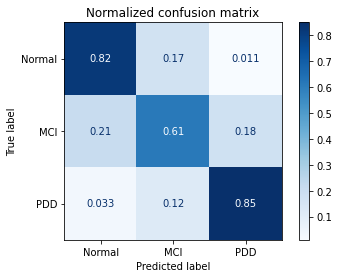

Normalized confusion matrix
[[0.806639   0.18506224 0.00829876]
 [0.20487805 0.58536585 0.2097561 ]
 [0.         0.17241379 0.82758621]]


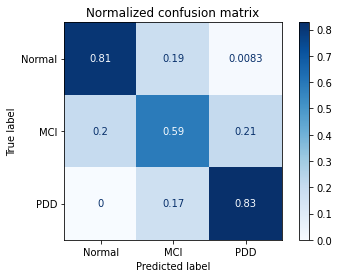

In [54]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit

#moca & npcog & mseadlg & age & educ & gender
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
#idx= npcogidx & mocaidx & sexidx & bdtidx & educidx & mocadtidx & weightidx & heightidx & syssupidx & diasupidx & sysstndidx & diastndidx & clincogidx & clinscoridx1 & pddxdtidx & infodtidx & pdstatusidx
idx= mocaidx & npcogidx & sexidx & bdtidx & educidx & mocadtidx & mseadlgidx & clincogidx #& clinscoridx1#& pdstatusidx#& clinscoridx1
bmi=weight[idx]/(height[idx]*10**-2)**2
data = np.stack((moca[idx],npcog[idx],age[idx],educ[idx],sex[idx],mseadlg[idx],clincog[idx],eventid[idx],patno[idx],delta_visit[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values # uncomment when not using on_off_dose class
#data1=data  # comment this when not using on_off_dose class
data=data1[:,:6].astype(float)
labels=data1[:,6].astype(float)


# defining parameter range 
param_grid = {'C': [0.00001,0.0001,0.001,0.01,0.1,0.5, 1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PDD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PDD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [58]:
np.shape(np.where(np.asarray(labels)==3))[1]
#len(labels)
#len(df)

89

(1534, 13)

In [ ]:
# create new csv file for sequential training
df = pd.read_csv('/content/drive/MyDrive/DeeP-PD/deep-pd/data/preprocessed/ppmi_full.csv')
df=df.sort_values('patno')
df = df.reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,4,5,6,7,8,10,14,15,18,21,24,28,29,32,42,43,48,51,100,102,109,117,130,131,132,133,134,135,136,137,138,139,147,148,154,158,163,164,165,175,180,194,199,206,212,218,225,234,237,238,241,243,311,313,315,317,319,321,323,325,327,329,331,333,335,337,339,341,343,345,347,365,382,383,389,392,393,399,400,404,407,408,409,411,412,414,415,416,420,421,423,424,425,428,429,435,438,439,445,448,493,494,497,498,500,505,507,511,515,520,523,525,527,529,531,534,544,545,574,575,576,654,656,658,660,662,664,666,668,670,688,689,692,694,708,709,732,734,760,764,766,768,770,778,779,792,793,794,795,796,797,798,800,802,803,804,846,849,854,863,865,870,871,900,901,902,903,918,929,931,949,960,961,962,963,964,965,966,967,972,973,1062,1072,1082,1083,1085,1094,1095,1101,1104,1105,1107,1139,1140,1142,1184,1185,1187,1426,1427,1429,1444,1575,1577,1596,1597,1612,1613,1615,1665,1666,1668,1673,1680,1687,1694,1695,1697,1707,1709,1

In [ ]:


#patient no
# patient number
pat = df.patno
patidx = ~(pat.isnull())
#visit
visit=df.infodt
visitidx = ~(visit.isnull())
count=pat[0]
freq=0
#delta of visit
deltavisit = np.zeros(len(visit))*float("NaN")
for i in range(len(deltavisit)):
    if visitidx[i] & patidx[i]:
      patno=pat[i]
      if count==patno:
        freq=freq+1
      else:
        freq=1
      if freq==1:
        first_year=int(visit[i][-4:]) 
        first_month=int(visit[i][:2])
        deltavisit[i] = 0
      else:
        visit_year=int(visit[i][-4:])
        visit_month=int(visit[i][:2])
        deltavisit[i] = (visit_year - first_year) * 12 + visit_month - first_month
      count=patno

In [ ]:
#concatenate
#all=np.concatenate((pat,visit,deltavisit,age,educ,sex,moca,npcog,symdig,height,weight,mseadlg,syssup,diasup,sysstnd,diastnd,clincog,clinscor),axis=0)
df1 = df[["patno", "infodt","gender","mcatot","np1cog","sdmtotal","htcm","wgtkg","mseadlg","syssup","diasup","sysstnd","diastnd","cogstate","cogdxcl"]]
#df1=pd.DataFrame(all, columns = ['Patient No','Visit Date','Delta_visit','Age','Education','Sex','MoCA','np1cog','symdig','Height','Weight','mseadlg','syssup','diasup','sysstnd','diastnd','clincog','clinscor'])

In [ ]:
#updated origial ppmi modified from Robbie's ppmi processed
# create new csv file for sequential training
df = pd.read_csv('/content/drive/MyDrive/DeeP-PD/deep-pd/data/preprocessed/ppmi_processed_pd.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df=df.drop(columns=['mds_updrs_pdmeddt','mds_updrs_pdmedtm','examtm','np3spch','np3facxp','np3rign','np3rigru','np3riglu','np3rigrl','np3rigll','np3ftapr','np3ftapl','np3hmovr','np3hmovl','np3prspr','np3prspl','np3ttapr','np3ttapl','np3lgagr','np3lgagl','np3risng','np3gait','np3frzgt','np3pstbl','np3postr','np3brady','annual_time_btw_dose_nupdrs'])
df=df.sort_values('patno')
df = df[df.infodt != '01/0019']
df = df.reset_index(drop=True)
#`on_off_dose` column needs to dropped and duplicates to be removed.
df.drop_duplicates(keep=False,inplace=True)
df = df.reset_index(drop=True)

#patient no
# patient number
pat = df.patno
patidx = ~(pat.isnull())
#visit
visit=df.infodt
visityear=pd.DatetimeIndex(visit).year.values
visitmonth=pd.DatetimeIndex(visit).month.values
visitidx = ~(visit.isnull())
count=pat[0]
freq=0
#df.to_csv('/content/drive/MyDrive/DeeP-PD/deep-pd/data/preprocessed/ppmi_modified.csv')

#delta of visit
deltavisit = np.zeros(len(visit))*float("NaN")
for i in range(len(deltavisit)):
    if visitidx[i] & patidx[i]:
      patno=pat[i]
      if count==patno:
        freq=freq+1
      else:
        freq=1
      if freq==1:
        #first_year=int(visit[i][-4:]) # from ppmi_full
        #first_month=int(visit[i][:2]) # from ppmi_full
        first_year=int(visityear[i])
        first_month=int(visitmonth[i])
        deltavisit[i] = 0
      else:
        #visit_year=int(visit[i][-4:])
        #visit_month=int(visit[i][:2])
        visit_year=int(visityear[i])
        visit_month=int(visitmonth[i])        
        deltavisit[i] = (visit_year - first_year) * 12 + visit_month - first_month
      count=patno

df['delta_visit'] = deltavisit
df['delta_visit'] = df['delta_visit']-df.groupby('patno')['delta_visit'].transform('min')
df=df.groupby('patno').apply(lambda x: x.sort_values('delta_visit'))
df.drop(columns=df.columns[0], 
        axis=1, 
        inplace=True)
df['delta_delta'] = df.groupby("patno").delta_visit.diff().fillna(0)
df
df.to_csv('/content/drive/MyDrive/DeeP-PD/deep-pd/data/preprocessed/ppmi_modified2.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5,6,7,8,9,11,15,16,19,22,25,29,30,33,43,44,49,52,101,103,110,118,131,132,133,134,135,136,137,138,139,140,148,149,155,159,164,165,166,176,181,195,200,207,213,219,226,235,238,239,242,244,312,314,316,318,320,322,324,326,328,330,332,334,336,338,340,342,344,346,348,366,383,384,390,393,394,400,401,405,408,409,410,412,413,415,416,417,421,422,424,425,426,429,430,436,439,440,446,449,494,495,498,499,501,506,508,512,516,521,524,526,528,530,532,535,545,546,574,575,576,655,657,659,661,663,665,667,669,671,689,690,693,695,709,710,733,735,761,765,767,769,771,779,780,793,794,795,796,797,798,799,801,803,804,805,847,850,855,864,866,871,872,888,901,902,903,904,919,930,932,934,950,961,962,963,964,965,966,967,968,973,974,1063,1073,1083,1084,1086,1095,1096,1102,1105,1106,1108,1140,1141,1143,1185,1186,1188,1427,1428,1430,1445,1576,1578,1597,1598,1613,1614,1616,1666,1667,1669,1674,1681,1688,1695,1696,1698,170

In [ ]:
visityear=pd.DatetimeIndex(visit).year.values
visitmonth=pd.DatetimeIndex(visit).month.values
int(visitmonth[i])

6

In [ ]:
# calculate histogram of total number of visits, length of visit, frequency of visit, frequency of delta of delta of visit
df1 = df.groupby(["patno"])['delta_visit'].agg([('_visit', 'max')]).add_prefix('duration').reset_index()

df2=df.groupby(["patno"]).size().reset_index(name="Times of visit")
df2['duration_visit(months)']=df1['duration_visit']
np.shape(df2)

df2['frequency of visit(months)']=df2['duration_visit(months)']/df2['Times of visit']
df['delta_delta'].max()

62.0

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DeeP-PD/deep-pd/data/preprocessed/ppmi_modified.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
# moca score
moca = df.mcatot
mocaidx = ~(moca.isnull())
clincog = df.cogstate
clincogidx = ~(clincog.isnull())
#np1cog
npcog=df.np1cog
npcogidx = ~(npcog.isnull())
npcog[npcog>0] = 1

educ = df.educyrs
educidx = ~(educ.isnull())

#bday
bdt = df.birthdt
bdtidx = ~(bdt.isnull())

#date of moca
mocadt = df.infodt
mocadtidx = ~(mocadt.isnull())

symdig = df.sdmtotal
symdigidx = ~(symdig.isnull())

sex = df.gender
sexidx = ~(sex.isnull())

#age at moca
age = np.zeros(len(moca))*float("NaN")
for i in range(len(age)):
    if mocadtidx[i] & bdtidx[i]:
        age[i] = int(mocadt[i][-4:]) - bdt[i]

eventid=df.event_id
eventidx=~(eventid.isnull())

# weight and height for BMI index
weight=df.wgtkg
weightidx=~(weight.isnull())
height=df.htcm
heightidx=~(height.isnull())

# supine blood pressure 
syssup=df.syssup
syssupidx=~(syssup.isnull())
diasup=df.diasup
diasupidx=~(diasup.isnull())

# standing blood pressure 
sysstnd=df.sysstnd
sysstndidx=~(sysstnd.isnull())
diastnd=df.diastnd
diastndidx=~(diastnd.isnull())

#Schwab and England activities
mseadlg=df.mseadlg
mseadlgidx=~(mseadlg.isnull())

clinscor = df.cogdxcl

delta_delta=df.delta_delta
delta_visit=df.delta_visit
patno=df.patno

#PD status
pdstatus=df.apprdx
pdstatusidx= ~(pdstatus.isnull())


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,4,5,6,7,8,10,14,15,18,21,24,28,29,32,42,43,48,51,100,102,109,117,137,138,139,148,154,158,163,164,165,175,180,194,199,206,212,218,225,234,237,238,311,313,315,317,319,321,323,325,327,329,331,333,335,337,339,341,343,345,347,365,382,383,389,392,393,399,400,404,407,411,412,448,497,498,520,523,525,527,529,531,544,545,626,628,630,632,634,636,638,640,642,660,661,664,666,704,706,732,736,738,750,751,764,765,766,767,768,769,770,772,774,775,776,818,821,826,835,837,842,843,872,873,874,890,901,903,921,932,933,934,935,936,937,938,939,944,945,1034,1044,1054,1055,1057,1066,1067,1073,1076,1077,1079,1111,1112,1114,1156,1157,1159,1398,1399,1401,1416,1547,1549,1568,1569,1584,1585,1587,1637,1638,1640,1645,1652,1659,1666,1667,1669,1679,1681,1682,1683,1684,1686,1687,1688,1697,1698,1699,1700,1701,1707,1708,1709,1710,1711,1713,1714,1715,1716,1717,1719,1720,1721,1722,1723,1725,1726,1727,1728,1729,1731,1732,1733

In [ ]:
idx= npcogidx & mocaidx & symdigidx & sexidx & bdtidx & educidx & mocadtidx & weightidx & heightidx & mseadlgidx & clincogidx & pdstatusidx
bmi=weight[idx]/(height[idx]*10**-2)**2
data = np.stack((moca[idx],npcog[idx],sex[idx],age[idx],educ[idx],symdig[idx],mseadlg[idx],bmi,pdstatus[idx],clincog[idx],eventid[idx],patno[idx],delta_visit[idx]),1)
data1=pd.DataFrame(data).drop_duplicates().values

In [ ]:
data1=pd.DataFrame(data1)
data1[13] = data1.groupby(11)[12].diff().fillna(0)
data1[12] = data1[12]-data1.groupby(11)[12].transform('min')

In [ ]:
data1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,30,0,2,67,16,42,95,22.276,1,1,V06,3001,0,0.0
1,29,0,2,68,16,48,95,21.4044,1,1,V08,3001,11,11.0
2,29,0,2,69,16,48,90,21.0517,1,1,V10,3001,23,12.0
3,29,1,2,70,16,45,90,21.5921,1,1,V12,3001,37,14.0
4,30,1,2,72,16,56,90,22.5071,1,1,V14,3001,58,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,26,1,2,78,12,47,90,32.5878,4,2,V12,92490,48,12.0
3751,28,0,2,68,16,47,100,26.4266,4,1,V04,92834,0,0.0
3752,29,0,2,70,16,46,100,26.546,4,1,V08,92834,19,19.0
3753,30,0,2,71,16,48,100,26.4266,4,1,V10,92834,33,14.0


In [ ]:
# calculate histogram of total number of visits, length of visit, frequency of visit, frequency of delta of delta of visit
df1 = data1.groupby([11])[12].agg([('visit', 'max')]).add_prefix('interval between first & last ').reset_index()

df2=data1.groupby([11]).size().reset_index(name="Number of visits")
df2['interval between first & last visit(months)']=df1['interval between first & last visit']
np.shape(df2)

df2['avg. frequency of visit(months)']=df2['interval between first & last visit(months)']/df2['Number of visits']


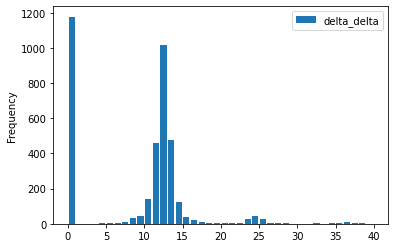

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
data1['delta_delta']=data1[13]
data1[['delta_delta']].plot(kind='hist',bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40],rwidth=0.8)
plt.show()